## Task 1: Data Loading and Exploration

In [2]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age of 177 passengers is missing, cabin number of 687 passenegers is missinog and embarked port name of 2 passengers is missing. This will create an issue in correclty predicting the outcome

## Task 2: Data Cleaning and Manipulation

In [5]:
# Handle missing values:
median_Age=df['Age'].median()
df['Age']=df['Age'].fillna(median_Age)
df['Age'].isna().sum()

0

In [6]:
# Create new features:
df['family_size']=df['Parch']+df['SibSp']
df['travel_alone']=df['family_size']==0

In [7]:
# Filter Data:
filtered_df=df.loc[(df['Age']>=18) & (df['Age']<=50)]

## Task 3: Exploratory Data Analysis

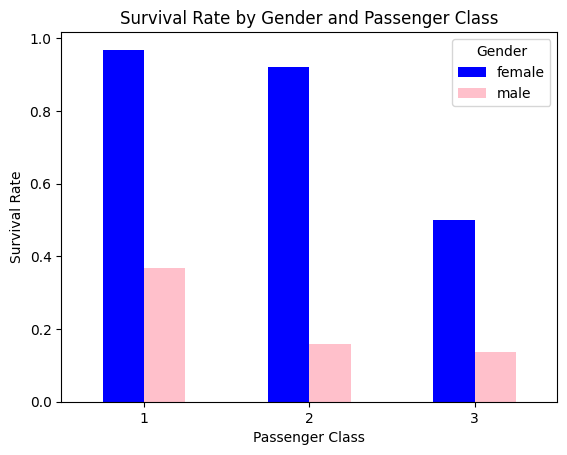

In [8]:
import matplotlib.pyplot as plt

# Visualize the survival rate by gender and passenger

# Calculate survival rate by Pclass and Sex
survival_rate = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plot the survival rate by Pclass and Sex
survival_rate.plot(kind='bar', stacked=False, color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Passenger Class')
plt.xticks(rotation=0)  # Keeps x-axis labels horizontal
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

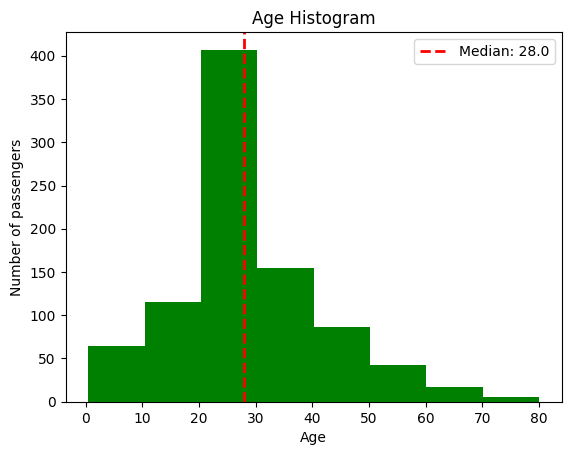

In [9]:
# Plot a histogram for the Age column and overlay the median.
plt.hist(df['Age'],bins=8,color='green')
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.title("Age Histogram")
# median line
plt.axvline(median_Age, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_Age:.1f}')
plt.legend()
plt.show()


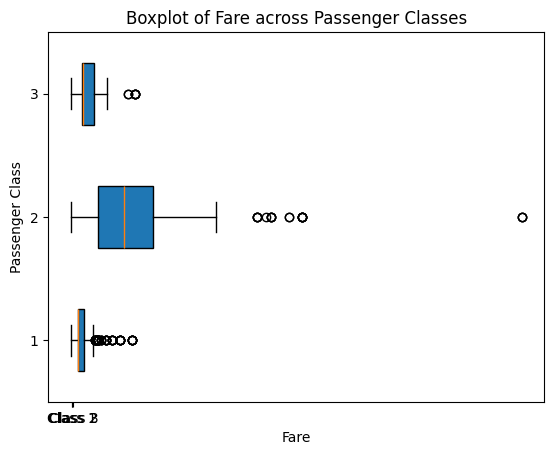

In [10]:
# Create a box plot of Fare across different passenger classes.
grouped_fare=[df[df['Pclass']==pclass]['Fare'] for pclass in df['Pclass'].unique()]


# Create boxplot
plt.boxplot(grouped_fare, patch_artist=True, vert=False, widths=0.5)

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Passenger Class')
plt.title('Boxplot of Fare across Passenger Classes')
plt.xticks([1, 2, 3], ['Class 1', 'Class 2', 'Class 3'])

# Show plot
plt.show()


## Task 4

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

/home/salman/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/salman/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [12]:
df=pd.read_csv("AB_NYC_2019.csv")

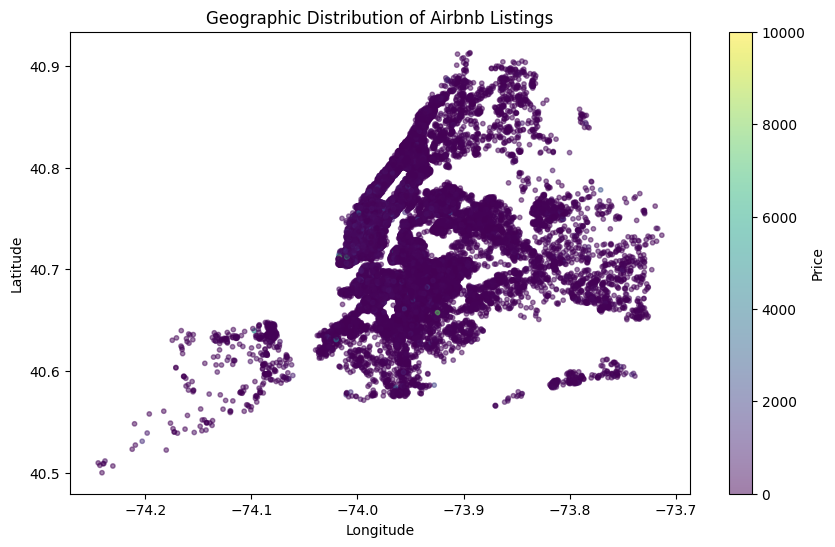

In [13]:
# Step 2.1: Plot geographic distribution using latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['price'], cmap='viridis', s=10)
plt.colorbar(label='Price')  # Add a color bar to indicate price scale
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Airbnb Listings')
plt.show()


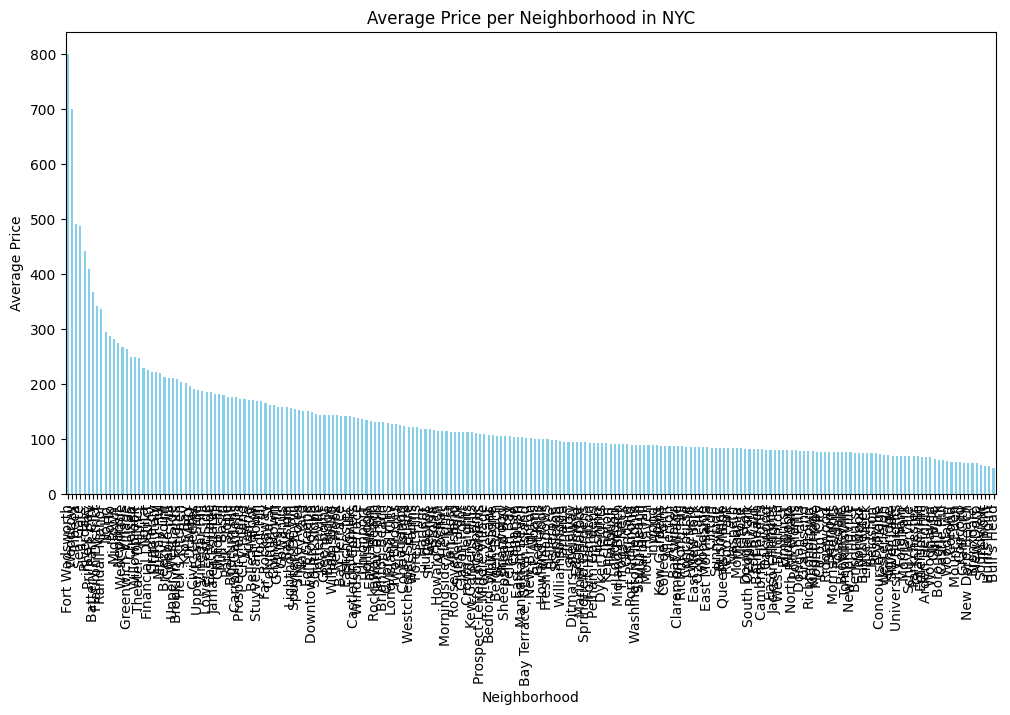

In [14]:
# Step 3.1: Group by neighborhood and calculate average price
avg_price_per_neighborhood = df.groupby('neighbourhood')['price'].mean()

# Sort by price for better visualization
avg_price_per_neighborhood = avg_price_per_neighborhood.sort_values(ascending=False)

# Plot the bar plot for average price per neighborhood
plt.figure(figsize=(12, 6))
avg_price_per_neighborhood.plot(kind='bar', color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price per Neighborhood in NYC')
plt.xticks(rotation=90)
plt.show()


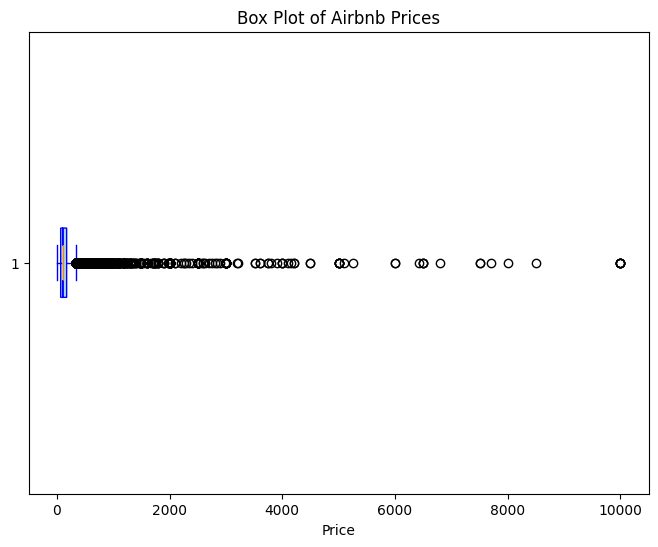

In [15]:
# Step 4.1: Create a box plot to identify outliers in the price column
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, notch=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
plt.xlabel('Price')
plt.title('Box Plot of Airbnb Prices')
plt.show()


## Understanding of Concepts  
In this lab, I applied data manipulation techniques such as handling missing values, filtering data, and creating new features to enhance dataset insights. I also explored Exploratory Data Analysis (EDA) through summary statistics, visualizations (histograms, box plots, and heatmaps), and correlation analysis. While working with geospatial data, I learned how to plot geographic distributions using latitude and longitude and analyze pricing variations across neighborhoods.  

New skills gained include handling missing values effectively, feature engineering (creating `family_size` and `travel_alone`), interpreting correlation matrices, and creating meaningful visualizations using Seaborn and Matplotlib.  


## Challenges Faced & Solutions  
Handling missing values was challenging as I was unsure whether to impute missing values in the `Age` column or remove them. I resolved this by using the median age to prevent skewing the data. Filtering data for specific age ranges also proved difficult as I needed to preserve the original DataFrame, which I solved using Pandas' `.loc[]` method. When visualizing correlations with a heatmap, my initial attempt failed due to non-numeric columns, so I preprocessed the data to include only numerical features. Additionally, the NYC Airbnb scatter plot was cluttered, making it hard to interpret, but I improved readability by adjusting the alpha transparency and reducing marker sizes.  
